# Array and string time complexity
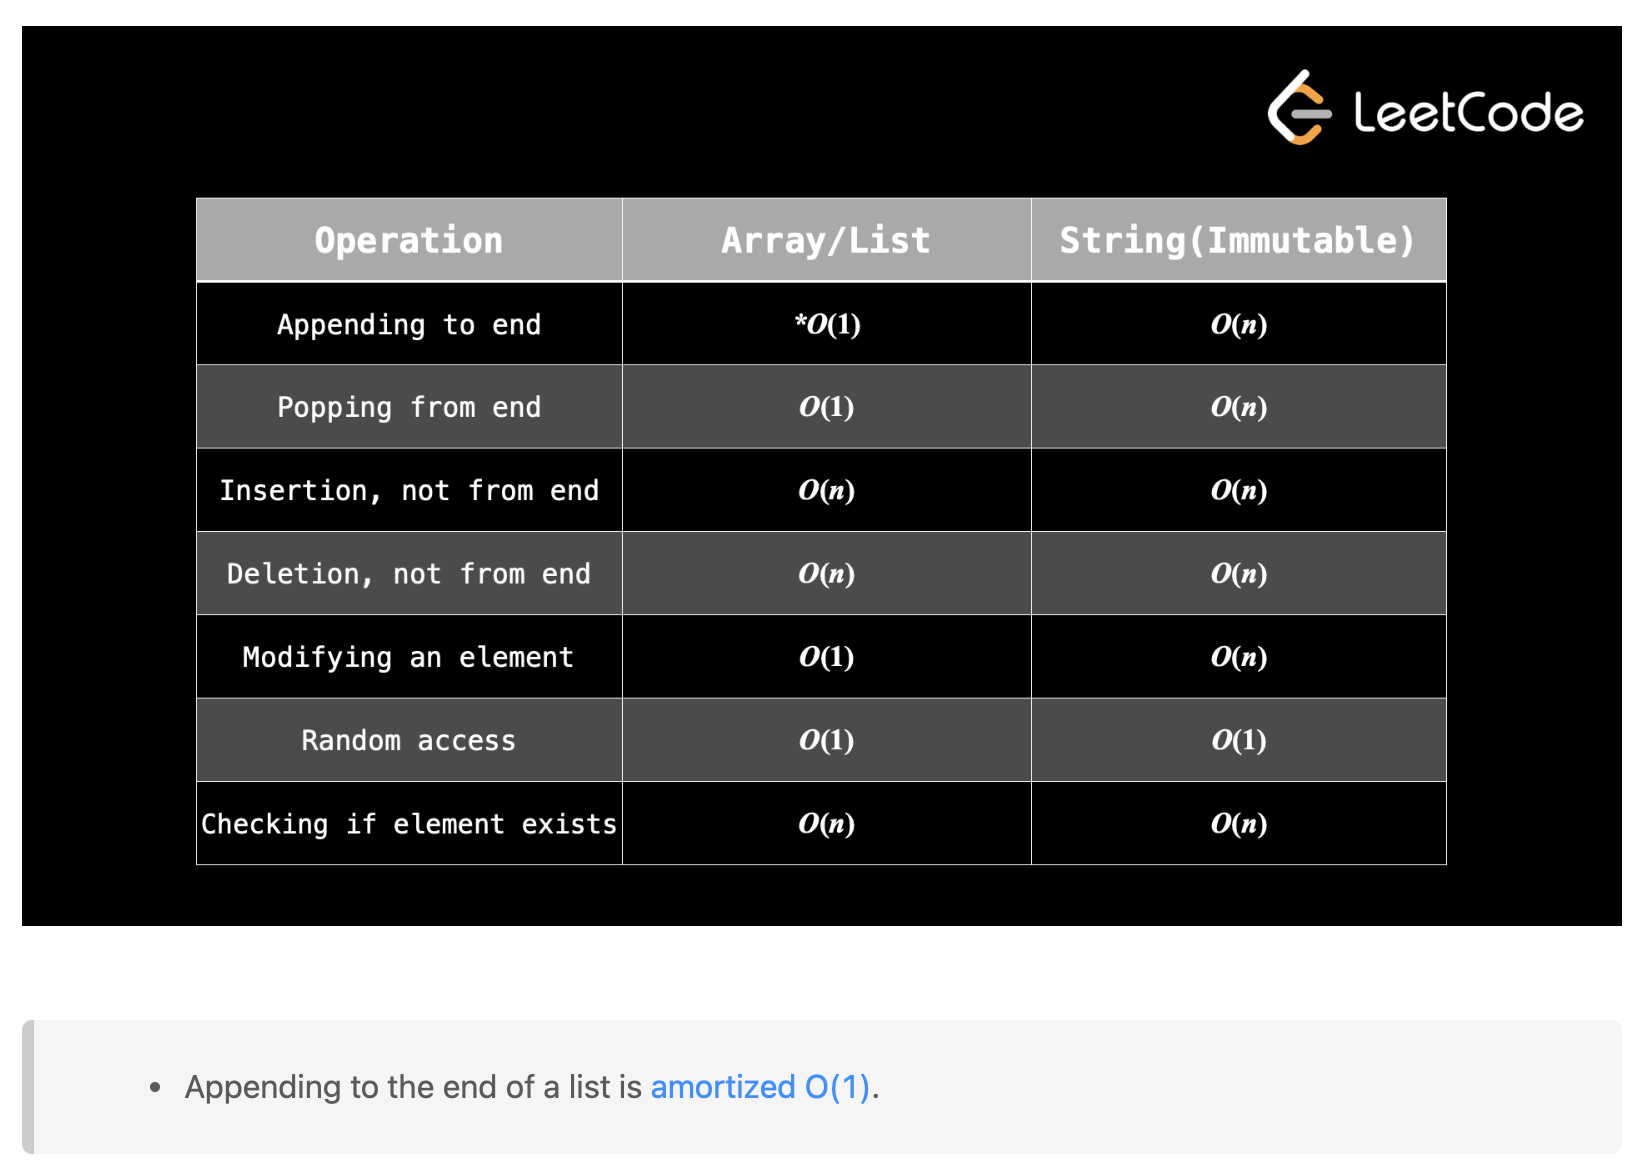

# Idea 1

* Start one pointer at the first index `0` and the other pointer at the last index `input.length - 1`.
* Use a while loop until the pointers are equal to each other.
* At each iteration of the loop, move the pointers towards each other. This means either increment the pointer that started at the first index, decrement the pointer that started at the last index, or both. Deciding which pointers to move will depend on the problem we are trying to solve.

```python
function fn(arr):
    left = 0
    right = arr.length - 1

    while left < right:
        Do some logic here depending on the problem
        Do some more logic here to decide on one of the following:
            1. left++
            2. right--
            3. Both left++ and right--
```

## Example 1 

**Given a string s, return true if it is a palindrome, false otherwise.**  

A string is a palindrome if it reads the same forward as backward. That means, after reversing it, it is still the same string. For example: "abcdcba", or "racecar".

In [1]:
def check_if_palindrome(string):
    left = 0
    right = len(string) - 1
    
    while left < right:
        if string[left] != string[right]:
            return False
        left += 1
        right -= 1
        
    return True

In [2]:
check_if_palindrome('test')

False

In [3]:
check_if_palindrome('abcdcba')

True

In [5]:
check_if_palindrome('a')

True

## Example 2

**Given a sorted array of unique integers and a target integer, return true if there exists a pair of numbers that sum to target, false otherwise. This problem is similar to Two Sum. (In Two Sum, the input is not sorted).**

For example, given `nums = [1, 2, 4, 6, 8, 9, 14, 15]` and `target = 13`, return `true` because 4 + 9 = 13.

In [8]:
def check_for_target(nums, target):
    left = 0
    right = len(nums) - 1
    
    while left < right:
        cur_sum = nums[left] + nums[right]
        if cur_sum == target:
            return True
        elif cur_sum > target:
            right -= 1
        else:
            left += 1
            
    return False

In [9]:
check_for_target([1, 2, 4, 6, 8, 9, 14, 15], 13)

True

In [10]:
check_for_target([1, 2, 3], 3)

True

# Idea 2

* Create two pointers, one for each iterable. Each pointer should start at the first index.
* Use a while loop until one of the pointers reaches the end of its iterable.
* At each iteration of the loop, move the pointers forward. This means incrementing either one of the pointers or both of the pointers. Deciding which pointers to move will depend on the problem we are trying to solve.
**Because our while loop will stop when one of the pointers reaches the end, the other pointer will not be at the end of its respective iterable when the loop finishes.** Sometimes, we need to iterate through all elements - if this is the case, you will need to write extra code here to make sure both iterables are exhausted.

```python
function fn(arr1, arr2):
    i = j = 0
    while i < arr1.length AND j < arr2.length:
        Do some logic here depending on the problem
        Do some more logic here to decide on one of the following:
            1. i++
            2. j++
            3. Both i++ and j++

    // Step 4: make sure both iterables are exhausted
    // Note that only one of these loops would run
    while i < arr1.length:
        Do some logic here depending on the problem
        i++

    while j < arr2.length:
        Do some logic here depending on the problem
        j++
```

## Example 3 

**Given two sorted integer arrays `arr1` and `arr2`, return a new array that combines both of them and is also sorted.**

In [10]:
def combine(arr1, arr2):
    i = j = 0
    result = []
    
    while i < len(arr1) and j < len(arr2):
        if arr1[i] <= arr2[j]:
            result.append(arr1[i])
            i += 1
        else:
            result.append(arr2[j])            
            j += 1

    for k in range(i, len(arr1)):
        result.append(arr1[k])
    
    for k in range(j, len(arr2)):
        result.append(arr2[k])
        
    return result        

In [12]:
combine([1, 2, 3], [1, 4, 6])

[1, 1, 2, 3, 4, 6]

## Example 4 ([392. Is Subsequence.](https://leetcode.com/problems/is-subsequence/))

**Given two strings `s` and `t`, return `true` if `s` is a subsequence of `t`, or `false` otherwise.**

A subsequence of a string is a sequence of characters that can be obtained by deleting some (or none) of the characters from the original string, while maintaining the relative order of the remaining characters. For example, "ace" is a subsequence of "abcde" while "aec" is not.

In [15]:
def is_subsequence(s, t):
    i = j = 0
    
    while i < len(s) and j < len(t):
        if s[i] == t[j]:
            i += 1
        j += 1
        
    return i == len(s)

In [20]:
is_subsequence('aec', 'abcde')

False

In [21]:
is_subsequence('ace', 'abcde')

True

In [22]:
is_subsequence('aec', '')

False

# Homework

## Problem 1 ([344. Reverse String](https://leetcode.com/problems/reverse-string/description/))

In [23]:
def reverse_string(s: list[str]) -> list[str]:
    left = 0
    right = len(s) - 1
    
    while left < right:
        s[left], s[right] = s[right], s[left]
        left += 1
        right -= 1
        
    return s

In [24]:
reverse_string(['h', 'e', 'l', 'l', 'o'])

['o', 'l', 'l', 'e', 'h']

## Problem 2 ([977. Squares of a Sorted Array](https://leetcode.com/problems/squares-of-a-sorted-array/description/))

In [26]:
def sorted_squares(nums: list[int]) -> list[int]:
    ans = [0] * len(nums)
    left = 0
    right = len(nums) - 1
    k = -1
    
    while left <= right:
        if abs(nums[left]) >= abs(nums[right]):
            ans[k] = nums[left] ** 2
            left += 1
        else:
            ans[k] = nums[right] ** 2
            right -= 1
        k -= 1
        
    return ans

In [29]:
sorted_squares([-4, -1, 0, 3, 10])

[0, 1, 9, 16, 100]

In [30]:
sorted_squares([-4, -1,])

[1, 16]

In [32]:
sorted_squares([-7, -3, 2, 3, 11])

[4, 9, 9, 49, 121]

## Problem 3 ([557. Reverse Words in a String III](https://leetcode.com/problems/reverse-words-in-a-string-iii/description/))

In [37]:
def reverse_words(s: str) -> str:
    arr = list(s)
    left = 0

    for i in range(len(arr)):
        if arr[i] == ' ' or i == len(arr) - 1:
            right = i - 1 if arr[i] == ' ' else i
            while left < right:
                arr[left], arr[right] = arr[right], arr[left]
                left += 1
                right -= 1
            left = i + 1
    return ''.join(arr)

In [38]:
reverse_words('Lets take LeetCode contest')

'steL ekat edoCteeL tsetnoc'

## Problem 4 ([917. Reverse Only Letters](https://leetcode.com/problems/reverse-only-letters/description/))

In [ ]:
# Input: s = "a-bC-dEf-ghIj"
# Output: "j-Ih-gfE-dCba"

In [42]:
def reverse_only_letters(s: str) -> str:
    arr = list(s)
    left = 0
    right = len(s) - 1

    while left < right:
        if not arr[left].isalpha():
            left += 1
        elif not arr[right].isalpha():
            right -= 1
        else:
            arr[left], arr[right] = arr[right], arr[left]
            left += 1
            right -= 1
    return ''.join(arr)

In [43]:
reverse_only_letters('a-bC-dEf-ghIj')

'j-Ih-gfE-dCba'

## Problem 5 ([2540. Minimum Common Value](https://leetcode.com/problems/minimum-common-value/description/))

In [44]:
def get_common(nums1: list[int], nums2: list[int]) -> int:
    i = j = 0
    while i < len(nums1) and j < len(nums2):
        if nums1[i] == nums2[j]:
            return nums1[i]
        elif nums1[i] > nums2[j]:
            j += 1
        else:
            i += 1
    return -1

In [50]:
get_common([4, 5, 6, 7], [1, 1, 2, 3, 6, 7])

6

## Problem 6 ([283. Move Zeroes](https://leetcode.com/problems/move-zeroes/description/))

In [56]:
def move_zeroes(nums: list[int]) -> list[int]:
    zero_pointer = 0
    
    for i in range(len(nums)):
        if nums[i] != 0:
            nums[zero_pointer], nums[i] = nums[i], nums[zero_pointer]
            zero_pointer += 1
            
    return nums

In [57]:
move_zeroes([0, 0, 1, 2, 3])

[1, 2, 3, 0, 0]

## Problem 7 ([2000. Reverse Prefix of Word](https://leetcode.com/problems/reverse-prefix-of-word/description/))

In [52]:
def reverse_prefix(word: str, ch: str) -> str:
    arr = list(word)
    left = 0
    
    for right in range(len(arr)):
        if arr[right] == ch:
            while left < right:
                arr[left], arr[right] = arr[right], arr[left]
                left += 1
                right -= 1
            return ''.join(arr)
            
    return word

In [54]:
reverse_prefix('xyxzxe', 'z')

'zxyxxe'